In [264]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import pandas as pd
import rwthcolors
import eurographics_style
import glob

109
109
109
109
109
bnb: 9.505926798165138 s
no_state_hashing: 17.23583326605505 s
no_proactive_pruning: 38.79342213761468 s
no_balanced_priority: 276.4940818348624 s
no_advanced_lower_bounds: 294.7662486238532 s


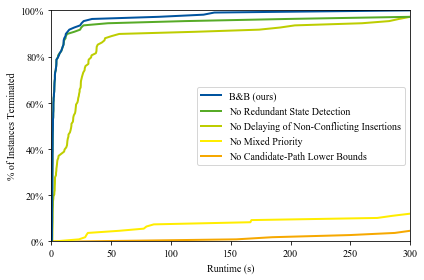

In [299]:
output_dir = '/local/born/layout-embedding-output'
bnb_ablation_output_dir = output_dir + '/bnb_ablation'
bnb_ablation_stats_path = bnb_ablation_output_dir + '/stats_shrec07.csv'

df = pd.read_csv(bnb_ablation_stats_path)

data_series = [
    {
        'name': 'bnb',
        'label': 'B&B (ours)',
        'color': 'rwth:blue',
        'filter': {'state_hashing': 1, 'proactive_pruning': 1, 'balanced_priority': 1, 'advanced_lower_bounds': 1},
        'z': 0.0,
    },
    {
        'name': 'no_state_hashing',
        'label': 'No Redundant State Detection',
        'color': 'rwth:green',
        'filter': {'state_hashing': 0, 'proactive_pruning': 1, 'balanced_priority': 1, 'advanced_lower_bounds': 1},
        'z': -1.0,
    },
    {
        'name': 'no_proactive_pruning',
        'label': 'No Delaying of Non-Conflicting Insertions',
        'color': 'rwth:maygreen',
        'filter': {'state_hashing': 1, 'proactive_pruning': 0, 'balanced_priority': 1, 'advanced_lower_bounds': 1},
        'z': -2.0,
    },
    {
        'name': 'no_balanced_priority',
        'label': 'No Mixed Priority',
        'color': 'rwth:yellow',
        'filter': {'state_hashing': 1, 'proactive_pruning': 1, 'balanced_priority': 0, 'advanced_lower_bounds': 1},
        'z': -3.0,
    },
    {
        'name': 'no_advanced_lower_bounds',
        'label': 'No Candidate-Path Lower Bounds',
        'color': 'rwth:orange',
        'filter': {'state_hashing': 1, 'proactive_pruning': 1, 'balanced_priority': 1, 'advanced_lower_bounds': 0},
        'z': -4.0,
    },
]

for ds in data_series:
    filt_keys = list(ds['filter'].keys())
    filt_vals = list(ds['filter'].values())
    def f(arg):
        return (arg[filt_keys] == filt_vals).all()
    ds['df'] = df[df.apply(f, axis=1)].copy()
    print(len(ds['df']))

for ds in data_series:
    name = ds['name']
    mean = ds['df']['runtime'].mean()
    print(f'{name}: {mean} s')
    
plt.figure(figsize=(6,4))

time_limit = 300.0
for ds in data_series:
    ds_df = ds['df']
    name = ds['name']
    label = ds['label']
    color = ds['color']
    
    ds_df[ds_df['runtime'] >= time_limit] = np.inf
    
    ascending_runtime = np.sort(ds_df['runtime'])
    percentiles = np.linspace(0, 1, len(ascending_runtime))
    
    cutoff = np.argwhere(ascending_runtime >= time_limit)[0][0]
    
    ascending_runtime = np.append(ascending_runtime[0:cutoff], time_limit)
    percentiles = np.append(percentiles[0:cutoff], percentiles[cutoff])
    
    ascending_runtime = np.append(0.0, ascending_runtime)
    percentiles = np.append(0.0, percentiles)
    
    plt.plot(ascending_runtime, percentiles, c=color, label=label, linewidth=2, zorder=ds['z'])
    plt.ylim(0, 1)
    plt.xlim(0, time_limit)
plt.xlabel('Runtime (s)')
plt.ylabel('% of Instances Terminated')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
plt.tight_layout()
plt.savefig('/home/born/projects/layouts/layout-embedding-paper/img/bnb-ablation/bnb-ablation-plot.pdf')